Taller 1 Métodos Computacionales 2 

Catalina Fuentes y Silvana Archila

Pregunta #1


In [164]:
import numpy as np

def transformada_discreta(y_k, t_k, f):
    N = len(t_k)
    suma = 0.+0j
    for i in range (N):
        suma += y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
    return suma


In [165]:
t_k = np.linspace(0,20,200)
y_k = np.sin(t_k)
f = 0.1

x = transformada_discreta(y_k,t_k,f)
print(x)

(10.18289058873271-9.43536532570872j)


Pregunta #2

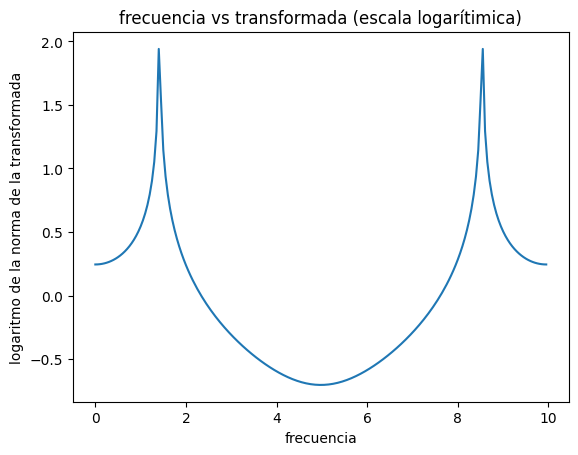

In [166]:
#GRÁFICA SEÑAL DE PRUEBA
import matplotlib.pyplot as plt
t_k = np.linspace(0,20,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(t_k[1]), 200)

x = transformada_discreta(y_k,t_k,f)
norma = abs(x)
normalog = np.log10(norma)

plt.plot(f,normalog)
plt.title("frecuencia vs transformada (escala logarítimica)")
plt.xlabel("frecuencia")
plt.ylabel("logaritmo de la norma de la transformada")
plt.show()


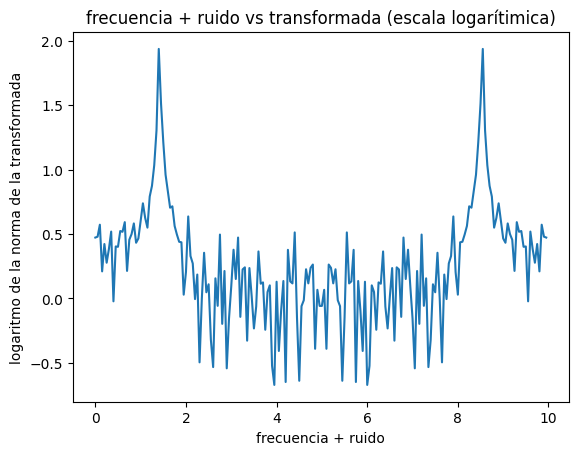

In [167]:
#GRÁFICA CON RUIDO EN Y
y_ruido = np.random.normal(0.0,0.1,len(y_k))
x = transformada_discreta(y_k + y_ruido,t_k,f)
norma = abs(x)
normalog = np.log10(norma)

plt.plot(f,normalog)
plt.title("frecuencia + ruido vs transformada (escala logarítimica)")
plt.xlabel("frecuencia + ruido")
plt.ylabel("logaritmo de la norma de la transformada")
plt.show()

Pregunta #3

In [168]:
#Hallar pico principal de señal de prueba

t_k = np.linspace(0,20,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k)
f = np.linspace(0, 1/(2*t_k[1]), 200)

def pico(y_k,t_k,f):
    x = transformada_discreta(y_k,t_k,f)
    norma = abs(x)
    normalog = np.log10(norma)  
    coord_x_pico = f[normalog.argmax()]
    coord_y_pico = np.log10(abs(transformada_discreta(y_k,t_k,coord_x_pico)))
    return coord_x_pico, coord_y_pico

coord_x_pico, coord_y_pico = pico(y_k, t_k, f)
print(f"El pico principal de la señal de prueba está en x={coord_x_pico} y y={coord_y_pico}")


El pico principal de la señal de prueba está en x=1.4249999999999998 y y=1.9657449751528826


In [169]:
#Hallar ancho de media altura FWHM de señal de prueba
media_altura = coord_y_pico/2

def fwhm(y_k,t_k,f):
    x = transformada_discreta(y_k,t_k,f)
    norma = abs(x)
    normalog = np.log10(norma)  
    indices_cruce = np.where(normalog >= media_altura)
    fwhm = f[indices_cruce[0][-1]] - f[indices_cruce[0][0]]
    
    return fwhm

FWHM = fwhm(y_k,t_k,f)
print(f"El ancho de media altura FWHM de la señal de prueba es FWHM={FWHM}")



el ancho de media altura FWHM de la señal de prueba es FWHM=0.19999999999999996


In [257]:
#Cambio número de muestras N
N = 1000
t_k_N = np.linspace(0,20,N)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k_N)
f_N = np.arange(0, 1/(2*t_k_N[1]), 0.01)

coord_x_pico, coord_y_pico = pico(y_k, t_k_N, f_N)
print(f"El pico principal de la señal con N={N} está en x={coord_x_pico} y y={coord_y_pico}")
FWHM = fwhm(y_k,t_k_N,f_N)
print(f"el ancho de media altura FWHM de la señal con N={N} es FWHM={FWHM}")




El pico principal de la señal con N=1000 está en x=1.41 y y=2.6944079438052393
el ancho de media altura FWHM de la señal con N=1000 es FWHM=1.6


La coordenada X del pico (la frecuencia) se acerca a un valor concreto al aumentar los Ns siempre y cuando se varíe el N respetando el límite de Nyquist (N >= 2tmax*fmax).
      
El ancho de media altura FWHM y no cambia conforme varía el N (aumenta), pues el FWHM solo es influido por el tmax y la frecuencia. PENDIENTE

In [171]:
#Cambio el rango de tiempo tmax
Z = 70
t_k_Z = np.linspace(0,Z,200)
y_k = np.sin(2*np.pi*np.sqrt(2)*t_k_Z)
f_Z = np.linspace(0, 1/(2*t_k_Z[1]), 200)

coord_x_pico, coord_y_pico = pico(y_k, t_k_Z, f_Z)
print(f"El pico principal de la señal con tmax={Z} está en x={coord_x_pico} y y={coord_y_pico}")
FWHM = fwhm(y_k,t_k_Z,f_Z)
print(f"El ancho de media altura FWHM de la señal con tmax={Z} es FWHM={FWHM}")


El pico principal de la señal con tmax=70 está en x=1.4214285714285713 y y=2.09819478416692
El ancho de media altura FWHM de la señal con tmax=70 es FWHM=0.014285714285714235


La coordenada X del pico (la frecuencia) se acerca a un valor concreto al aumentar el tmax siempre y cuando se varíe el tmax respetando el límite de Nyquist (tmax >= N/2fmax).

El ancho de media altura FWHM sí cambia conforme varía el tmax (disminuye). Esto sucede por la relación de incertidumbre, que establece que entre menos sepa del tiempo (mayor tmax), más sabré de la frecuencia (frecuencia más definida), lo que implica un ancho de media altura FWHM más pequeño.

Pregunta #4

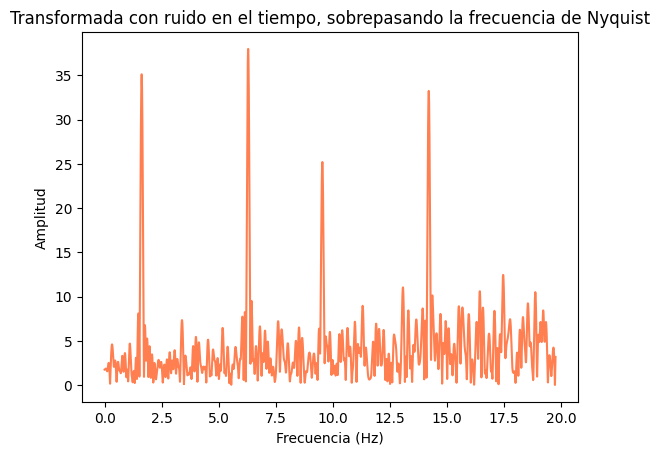

El pico principal de la norma de la transformada al evaluar la transformada hasta varias veces la frecuencia de Nyquist es 6.285 Hz.


In [343]:
N = 80
t0 = np.linspace(0,10,N)
t_k = t0 + np.random.normal(0.,0.01,N)
f = 2*np.pi
y_k = np.sin(2*np.pi*t_k*f)
fs = np.arange(0, 5/(2*t0[1]), 0.005)

x = transformada_discreta(y_k,t_k,fs)
norma = abs(x)

plt.plot(fs,norma, color = "coral")
plt.title("Transformada con ruido en el tiempo, sobrepasando la frecuencia de Nyquist")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()
print(f"El pico principal de la norma de la transformada al evaluar la transformada hasta varias veces la frecuencia de Nyquist es {fs[norma.argmax()]} Hz.")

Sí se recupera la señal original, pues añadirle ruido en el tiempo hace que tengamos más samples que permiten descartar las frecuencias falsas causadas por el aliasing, pues el ruido genera puntos sobre la señal original. Es por eso que si se le añade ruido en el tiempo es posible recuperar la señal original incluso sobrepasando el límite de Nyquist.

Pregunta #5

In [173]:
#Descarga de datos
import pandas as pd
df = pd.read_csv("datos_taller1.dat", sep="\s+", names=["t", "y", "sigma"])


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Catalina Fuentes\AppData\Local\Temp\ipykernel_13556\6186535.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("datos_taller1.dat", sep="\s+", names=["t", "y", "sigma"])


Frecuencia principal: 3.2592064801620038
Frecuencia de muestreo: 0.499550404635827


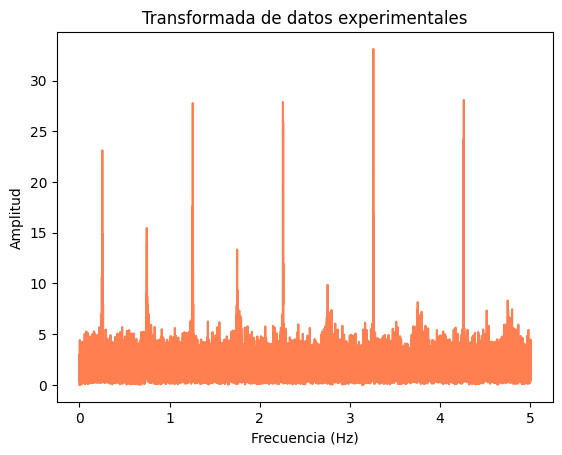

In [347]:
sampling_freq = 1 / (df["t"][1] - df["t"][0])
f = np.linspace(0, 5, 40000)
transformada = transformada_discreta(df["y"] - df["y"].mean(), df["t"], f)
main_freq = f[np.argmax(np.abs(transformada))]
print("Frecuencia principal:", main_freq)
print("Frecuencia de muestreo:", sampling_freq)

plt.plot(f,np.abs(transformada), color = "coral")
plt.title("Transformada de datos experimentales")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

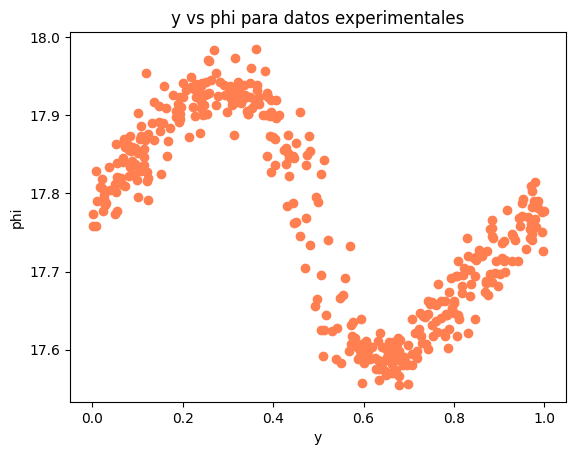

In [351]:
phi = np.mod(df["t"]*main_freq, 1)

plt.scatter( phi, df["y"], color = "coral")
plt.title("y vs phi para datos experimentales")
plt.xlabel("y")
plt.ylabel("phi")
plt.show()


En la gráfica de y vs phi se puede observar un patrón ondulatorio, lo que muestra que la señal original es de naturaleza periódica, es decir que se está repitiendo de forma cíclica la variación de la fase. 